In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [14]:
data = iris.data
target_names = iris.target_names
target = iris.target
feature_names = iris.feature_names

In [22]:
X = data[:, [2,3]] # Забираем третью и четвёртую колонки
y = target
np.unique(y) # Показывает категории

array([0, 1, 2])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Многие алгоритмы машинного обучения и оптимизации требуют выполнения масштабирования признаков
# Ниже будет выполнена стандартизация, используя метод StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# sc.fit(X_train) # Считает эмперическое среднее (ню) и стандартное отклонение (сигма)
# для каждой размерности признаков
# Стандартизирование значений, используя ню и сигма из предыдущего значения
# X_train_std = sc.transform(X_train) 
# X_test_std = sc.transform(X_test)   
# Если нужно меньше писать, ниже в две строчки
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [35]:
# После стандартизации можно тренировать модель. Большинство алгоритмов scikit-learn
# поддерживают многоуровневую классификацию уже по умолчанию, благодаря методу 
# "один против остальных" - One-vs-Rest, OvR, который позволяет передать в персептрон сразу все
# три класса цветков

In [96]:
# Модельный параметр eta0 - темп обучения. Если темп обучения слишком большой, то алгоритм
# может промахнуться по глобальному минимуму сходимости. Если слишком маленький, то для 
# достижения сходимости потребуется большое количество эпох, что замедлит скорость обучения.

from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=400, eta0=0.01, random_state=0) #вместо n_iter использован max_iter
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=400, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [97]:
from sklearn.metrics import accuracy_score

y_pred = ppn.predict(X_test_std)
print(f"Число ошибочно классифицированных образцов: {(y_test != y_pred).sum()}")
print(f"Верность модели: {accuracy_score(y_test, y_pred)}")

Число ошибочно классифицированных образцов: 3
Верность модели: 0.9333333333333333


In [99]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # Настраиваем генератор маркеров и палитру
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel делает массив 1D
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать все образцы
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)
        # вылелить тестовые образцы
        
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                       alpha=1.0, linewidths=1, marker='o',
                       s=55, label='Тестовый набор')
        
    

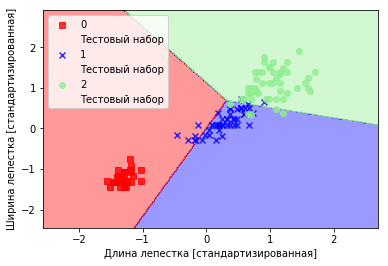

In [100]:
X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined_std = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined_std, 
                       classifier=ppn, test_idx=range(105,150))
plt.xlabel("Длина лепестка [стандартизированная]")
plt.ylabel("Ширина лепестка [стандартизированная]")
plt.legend(loc='upper left')
plt.show()
